# Ceneo Analyzer

## Bibilioteki

In [14]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

## Lista kodów wszystkich produktór, o których zostały pobrane 

In [2]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

156802519
39562616


## Kod produktu dla którego ma zostać wykonana analiza opinii

In [3]:
product_id= input("podaj kod produktu w serwisie Ceneo.pl")

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [45]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [ ]:
opinions

## Przekształcanie danych

In [46]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split("/")[0].replace(",",".")).astype(float)

## podstawowe statystyki

In [47]:
opinions_count = len(opinions)
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

## Histogram częśtości poszczegolnych ocen w opiniach o produkcie

rating
0.0      0
0.5      2
1.0      0
1.5      0
2.0      0
2.5      1
3.0      1
3.5      1
4.0      1
4.5      9
5.0    118
Name: count, dtype: int64


Text(0.5, 1.0, 'mocny')

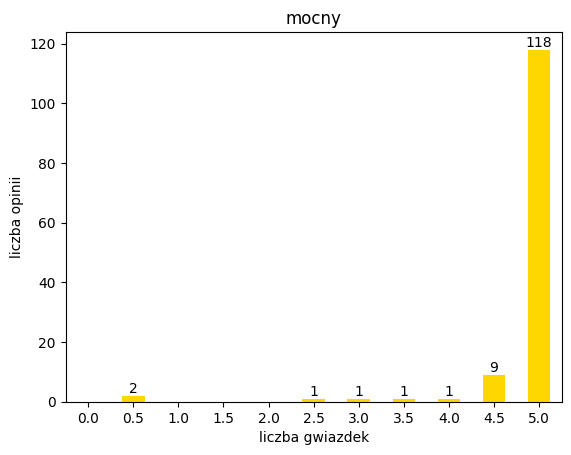

In [48]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0, 5.5, 0.5), fill_value = 0)
print(rating_distribution)
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = "gold")
plt.xticks(rotation = 0)
plt.xlabel("liczba gwiazdek")
plt.ylabel("liczba opinii")
ax.bar_label(ax.containers[0], label_type = 'edge', fmt=lambda x: int(x) if x>0 else "")
plt.title("mocny")

## udział poszczególnych rekomendacji w opiniach o produkcie

Text(0.5, 1.0, 'udział rekomendacji w opiniach')

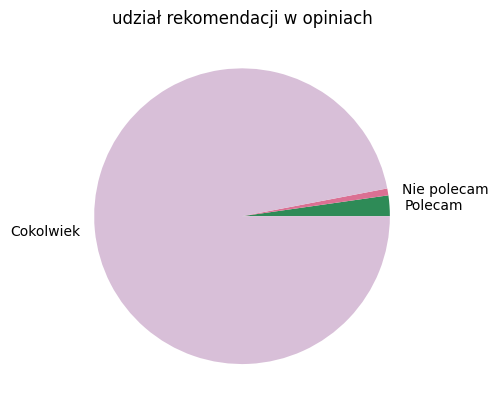

In [51]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam","Nie polecam",None])
recommendation_distribution
recommendation_distribution.plot.pie(label="", colors = ["seagreen","palevioletred", "thistle"], labels = ["Polecam","Nie polecam","Cokolwiek"])
plt.title("udział rekomendacji w opiniach")